# Certamen de Simulación Estocástica - Pregunta 3
- Diego Astaburuaga

**III.** En esta pregunta se busca simular funciones de $L^2(\Omega)$. Para esto, recordamos que una función $f(t)\in L^2(\Omega)$ se puede escribir mediante una secuencia de bases ortogonales $\{\phi_i\}_{i=0}^\infty$ y una secuencia de números reales $\{\kappa_i\}_{i=0}^\infty$ como

$$
f(t):=f(t,\{\kappa_i\}_{i=0}^\infty)=\sum_{i=0}^\infty\kappa_i\phi_i(t)
$$

Considernando la secuencia de variables aleatorias independientes $\{S_k\}_{k=0}^\infty$ donde $S_k$ proviene de una distribución $Beta(1-\alpha,\theta +\alpha k)$. Se puede demostrar que el proceso $W_k=S_k\Pi_{i=0}^{k-1}(1-S_i)$ satisface que $W_k>0$ para todo número $k$ y que además $\sum_{k=0}^\infty W_k=1$. Realice las simulaciones:

## a) Simular la secuencia $W_k$ para distintos valores de $\alpha$ y $\theta$. Describa lo observado y fundamente con gráficos apropiados.

Ideas:

- Entender $W_k$ como una serie de tiempo para comparar entre distintos parameters.
    - Trabajar $W_k$ como datos y calcular su varianza y gráficarla versus los parametros.
    - Entender si existe tendencia en $W_k$ para los distintos parametros (considerar log(y)=x+\epsilon).

In [67]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.stats import beta

In [68]:
def simulate_Wk(n_max, alpha, theta, tol=0, n_min=None):
    """
    Simulate an array of W_k values of size n_max based on given specifications.
    
    Args:
        n_max (int): Size of the array.
        alpha (float): Alpha parameter of the beta distribution.
        theta (float): Theta parameter of the beta distribution.
        tol (float): Tolerance for the sum of W_k to reach 1.

    Returns:
        numpy.ndarray: Array of simulated W_k values.
    """

    if n_min is None:
        n_min = n_max
    # Initialize arrays for S_k and W_k
    Sk = []
    Wk = []

    # Simulate the first S_k
    new = beta(1 - alpha, theta).rvs(1)
    Sk.append(new[0])

    # Calculate the first W_k
    Wk.append(Sk[0])

    k = 1

    product_term = 1
    # Continue simulating until the sum of W_k is close to 1
    while (np.abs(1 - np.sum(Wk)) > tol or k < n_min) and k < n_max:
        # Simulate the next S_k
        new = beta(1 - alpha, theta + alpha * k).rvs(1)
        Sk.append(new[0])

        # Calculate the next W_k
        product_term *= (1 - Sk[k-1])
        Wk.append(Sk[k] * product_term)
        
        k += 1

    # Return the simulated W_k values
    return Wk

# Define the parameters
n_max = 1_000
alpha = 0.5
theta = 5.0

# Simulate W_k values
Wk = simulate_Wk(n_max, alpha, theta, tol = 0.1, n_min = 10)

# Calculate the difference between the sum of W_k and 1
difference = np.abs(np.sum(Wk) - 1)

#Calculate the len
k = len(Wk)

# Print the result
print(f'Difference between the sum of W_k and 1: {difference:.4f} con {k=}')

Difference between the sum of W_k and 1: 0.0992 con k=153


Note que en $Beta(1-\alpha,\theta +\alpha k)$, existe la condición de que las entradas de la distribución deben ser no negativos para todo $k\in \mathbb{N}$, por lo tanto $\alpha\in(0,1)$ y $\theta>0$

Notese que para varios posibles valores de $\alpha$ y $\theta$ se debería verificar computacionalmente que la suma de la sucesión $W_k$ efectivamente da 1, como son terminos positivos y estamos truncando la sucesión, esta debería ser cercana 1, en efecto:

experimentando con distintos largos de la cadena $W_k$ se deduce que para tener una cadena significativa en el sentido que todos los valores sumen 1 aproximadamente, hay que trabajar con valores altos. En lo siguiente se puede deducir que según los valores de $\theta$ y $\alpha$, se requieren más o menos valores para alcanzar la tolerancia.

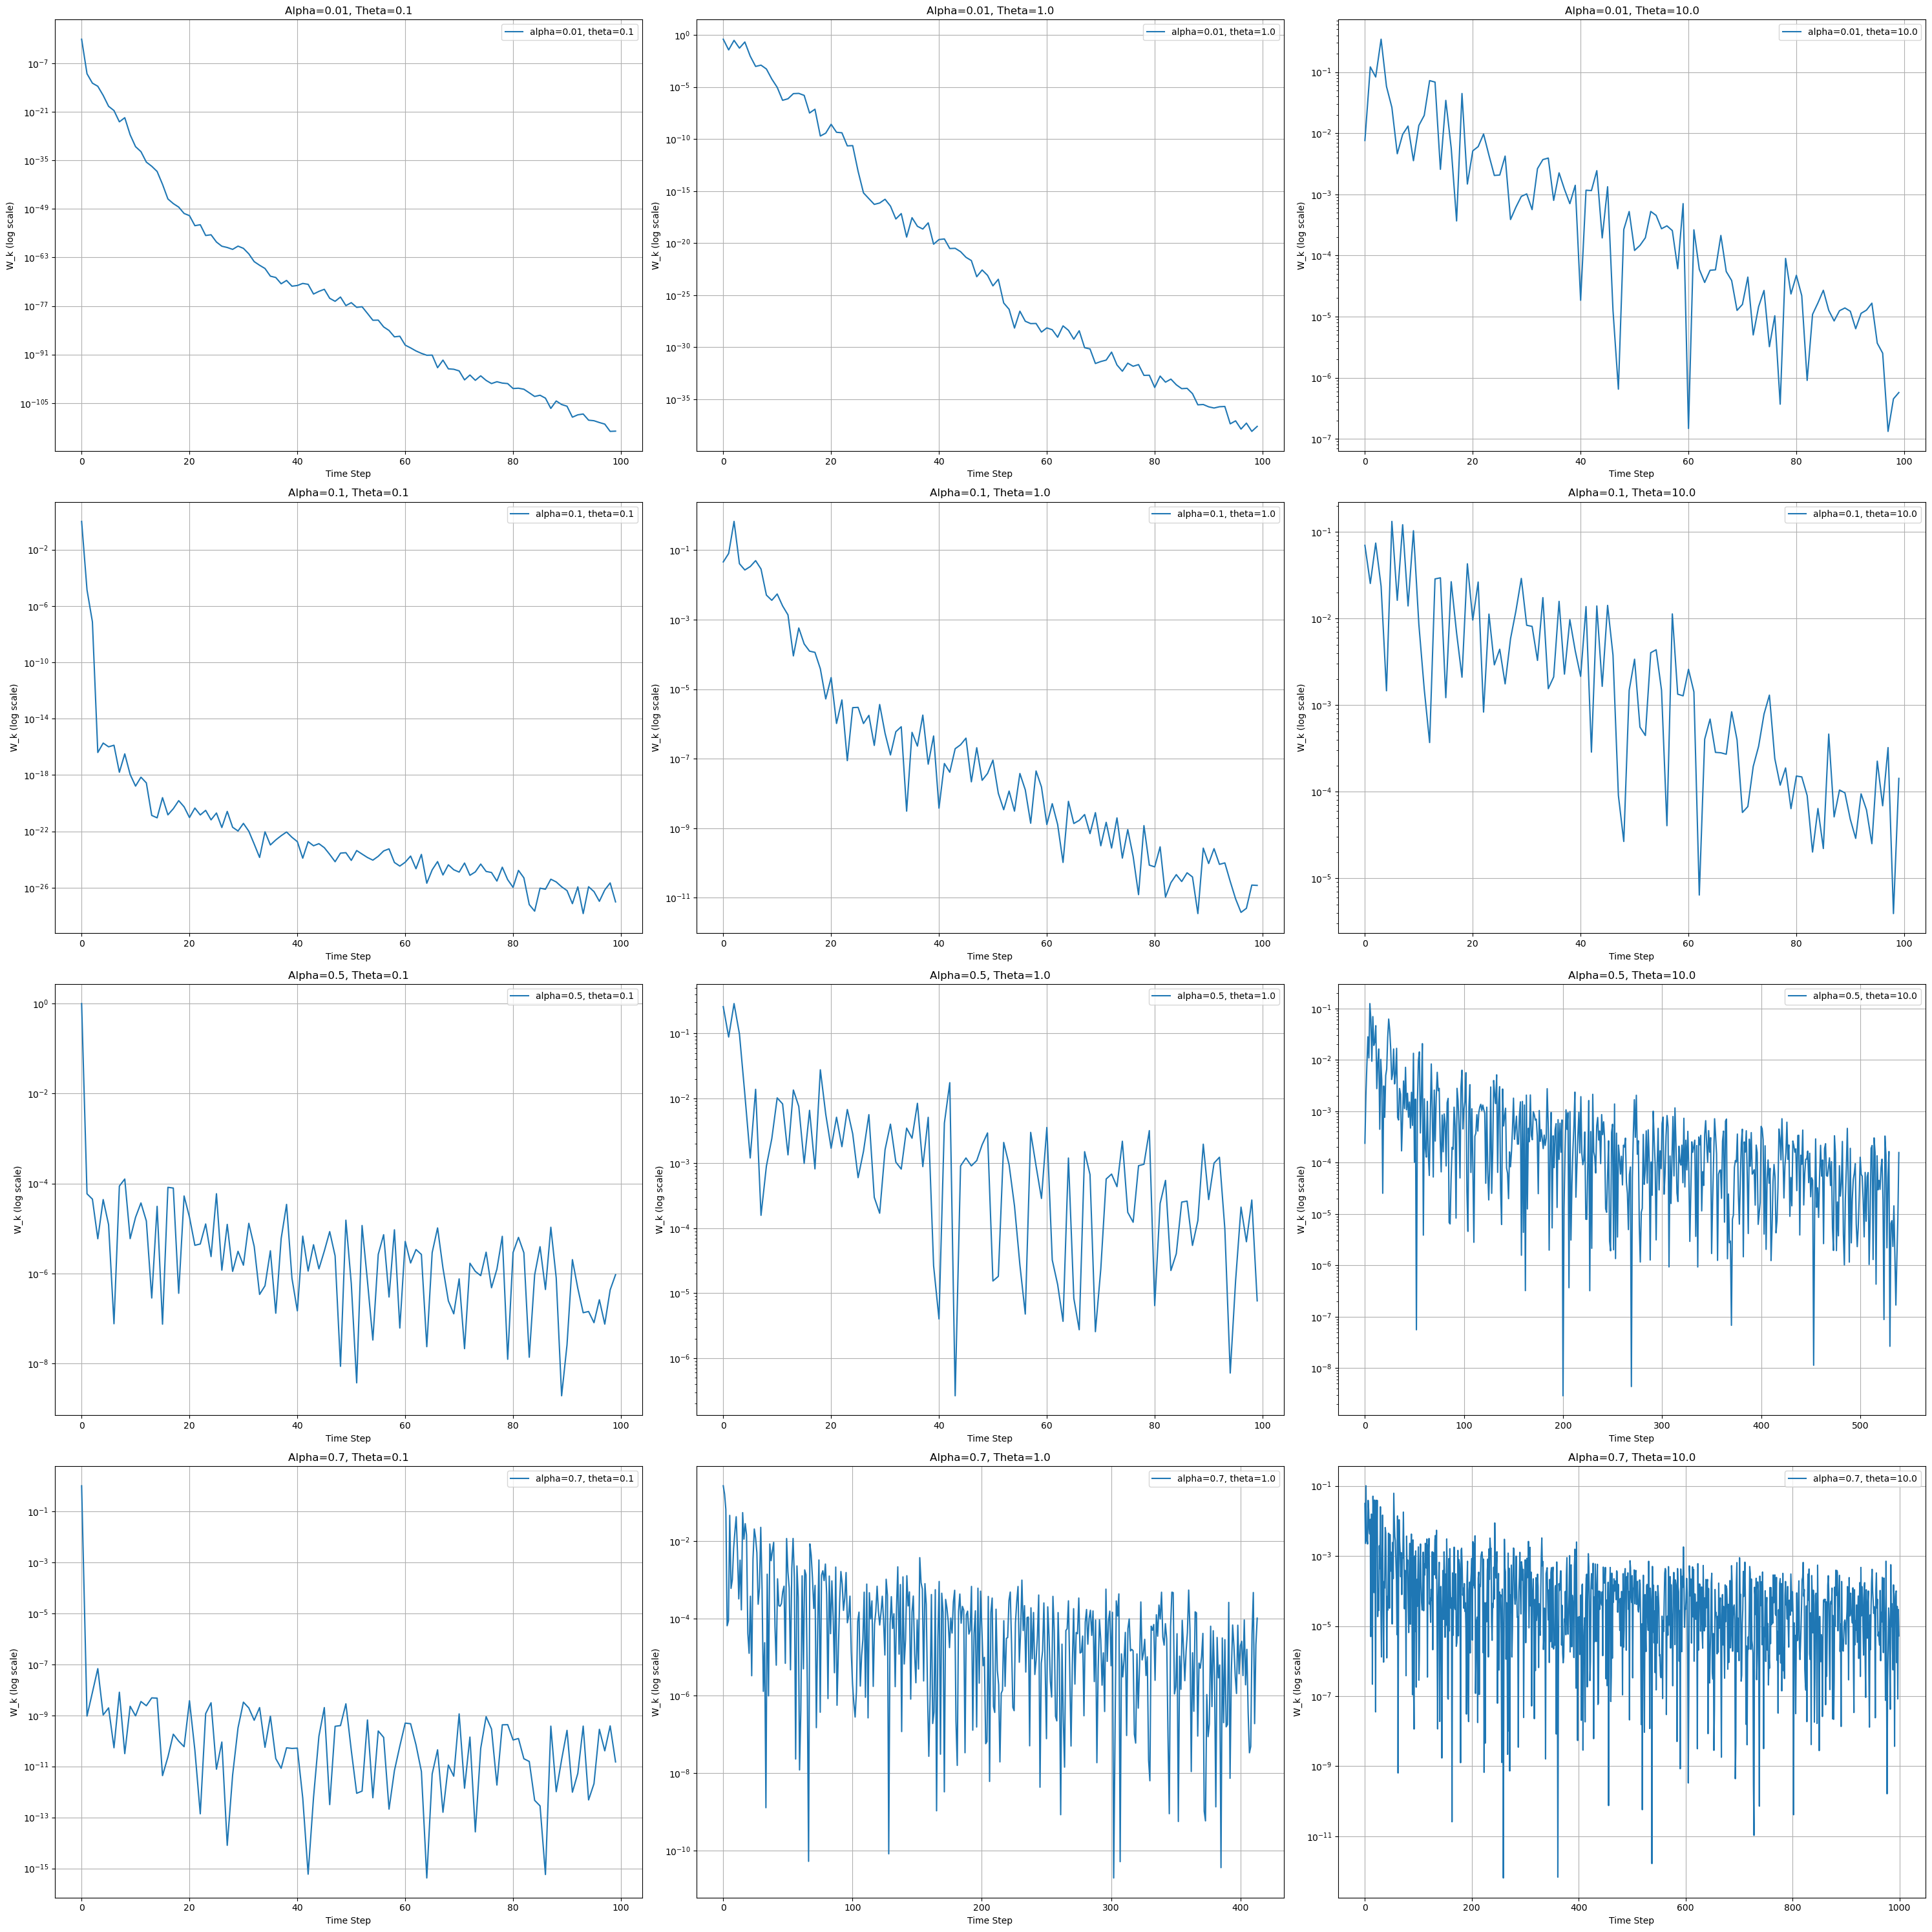

In [69]:
# Definir parámetros y configuración
n_max = int(1e3)  # Tamaño maximo de la serie de tiempo
alpha_grid = [0.01, 0.1, 0.5, 0.7]  # Valores de alpha
theta_grid = np.logspace(-1, 1, 3 )  # Valores de theta

num_plots = len(alpha_grid) * len(theta_grid)  # Número total de gráficos

# Crear subplots para cada combinación de alpha y theta
fig, axes = plt.subplots(len(alpha_grid), len(theta_grid), figsize=(30, 30))

# Iterar a través de los valores de alpha y theta
for i, alpha in enumerate(alpha_grid):
    for j, theta in enumerate(theta_grid):
        # Simular la serie de tiempo utilizando simulate_Wk
        Wk = simulate_Wk(n_max, alpha, theta, tol=0.05, n_min=100)
        
        # Graficar la serie de tiempo en el subplot correspondiente
        ax = axes[i, j]
        ax.plot(np.arange(len(Wk)), Wk, label=f'alpha={alpha}, theta={theta}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('W_k (log scale)')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje Y
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        ax.grid(True)
        ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

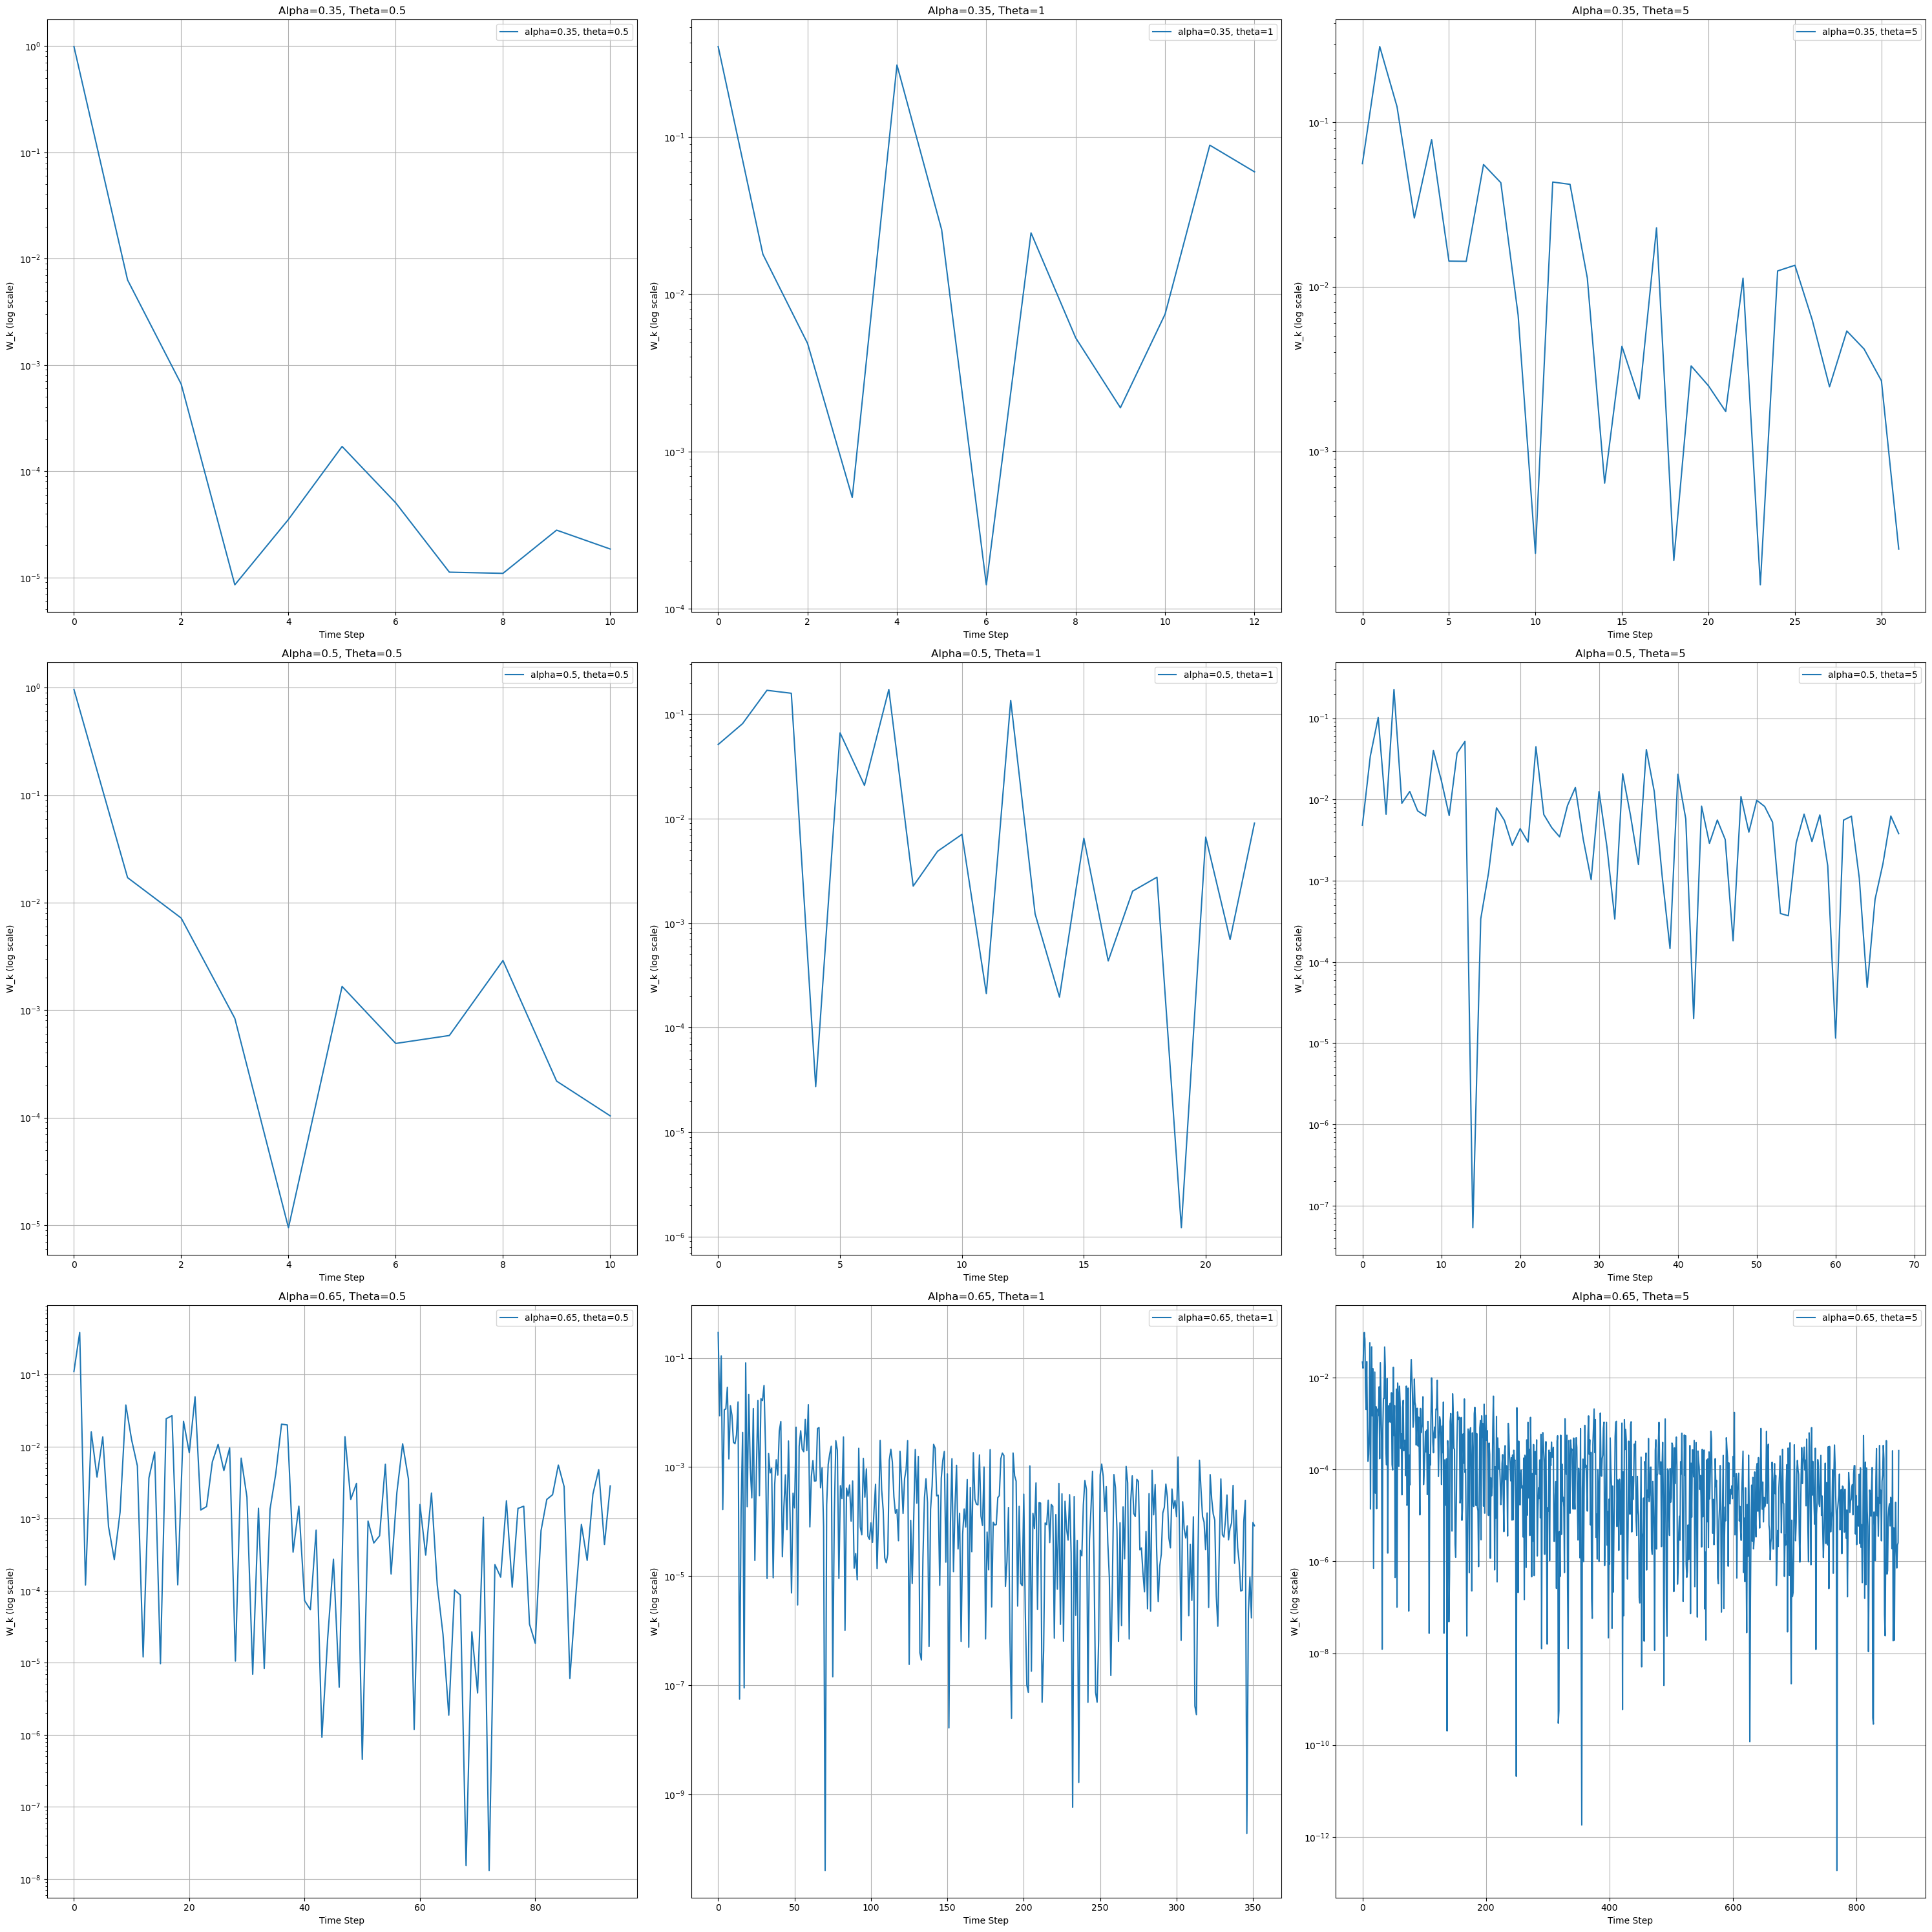

In [132]:
# Definir parámetros y configuración
n_max = 1_000  # Tamaño maximo de la serie de tiempo
alpha_grid = [0.35, 0.5, 0.65]  # Valores de alpha
theta_grid = [0.5, 1, 5]  # Valores de theta

num_plots = len(alpha_grid) * len(theta_grid)  # Número total de gráficos

# Crear subplots para cada combinación de alpha y theta
fig, axes = plt.subplots(len(alpha_grid), len(theta_grid), figsize=(30, 30))

# Iterar a través de los valores de alpha y theta
for i, alpha in enumerate(alpha_grid):
    for j, theta in enumerate(theta_grid):
        # Simular la serie de tiempo utilizando simulate_Wk
        Wk = simulate_Wk(n_max, alpha, theta, tol=0.1, n_min=10+1)
        
        # Graficar la serie de tiempo en el subplot correspondiente
        ax = axes[i, j]
        ax.plot(np.arange(len(Wk)), Wk, label=f'alpha={alpha}, theta={theta}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('W_k (log scale)')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje Y
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        ax.grid(True)
        ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

En efecto convergen rápido.

- Valores con serie que llegan a 1000 significa que no alcazarón la convergencia a 1 con una tolerancia de $0.05$.
- Se observa que para $\alpha\geq 0.8$ hay una clara convergencia lenta, por ende por el bien del computo, se usarán valores de $\alpha$ que permitan tener una convergencia rapida, es decir, $\alpha\leq 0.5$.
- Mediante varios ejemplos de simulación como el anterior, se considerará que utilizar $\alpha \in (0,0.5)$ por la convergencia que presenta para $\theta$ en el rango mostrado.
- Se observa que de forma clara, a mayor $\theta$, mayor es la cantidad de iteraciones necesarias hasta alcanzar la convergencia.
- Se pueden hacer experimentos exhaustivos de simulación para determinar el número esperado de simulaciones para alcanzar una cierta tolerancia dados parámetros $\alpha$ y $\theta$, los cuales no se realizan el favor de la longitud del documento.

Importante: A partir de ahora y según lo observado en los puntos anteriores, utilizaremos $\alpha\in (0.1, 0.5]$ y $\theta \in (0,10]$ en favor de los tiempos de computo y velocidad de convergencia de $W_k$.

Además viendo el gráfico generado, se puede conjeturar que el valor de $\alpha$ determina en cierta forma que tan rápido decrecen los valores de la sucesión $W_k$ mientras que $\theta$ parece que al ser mayor aumenta la varianza...

> Se hizo un grafico de varianza que mostraba que para theta alto esta se aplacaba, pero es claro de caracter de la sucesion a tender a 0 muy rapido.

Se comenta que para $\theta$ grande, la varianza de la serie es baja, mientras que para $\theta$ bajo, está es alta. Respecto al valor de $\alpha$, para $\alpha$ cercano a $1$ la varianza cae bruscamente mientras que para el resto de casos, parecen tener el mismo comportamiento.

## b) Usando la representación para la funciones $L^2$, genere un código que pueda generar funciones que satisfacen que:

### 1) Sean periódicas y pares en $L^2([-1,1])$.

Para esta parte considere la base ortonormal de $L^2([0,L])$ dada por:

$$
S = \left\{\sqrt{\frac{2}{L}}\cos\left(\frac{k\pi}{L}x\right)\right\}_{k=0}^\infty
$$

que se puede escribir en este caso de $L^2([-1,1])$ como:

$$
S = \left\{cos\left(\frac{k\pi}{2}(x+1)\right)\right\}_{k=0}^\infty
$$

Denote $\varphi_k=cos\left(\frac{k\pi}{2}(x+1)\right)$, según análisis anteriores, si se escribe
$$
f(x)=\sum_{k=0}^nw_k\varphi_k(x)
$$

para $n=100$, se debería tener una buena aproximación para los parámetros $\alpha=\theta=0.5$.

Para entender la función, se debe tener en cuenta que hay que realizar carácterizarla por sus evaluaciones en ciertos puntos (en este caso equiespaciados en [-1, 1]) $x_0,\dots,x_N$ para $N$ adecuado. De esta forma se puede escribir
$$
f(x)\cong
\begin{pmatrix}
f(x_0)\\
\vdots\\
f(x_N)
\end{pmatrix}
=
\begin{pmatrix}
\varphi_0(x_0) & \ldots & \varphi_n(x_0)\\
\vdots & \ddots & \vdots\\
\varphi_0(x_N) & \ldots & \varphi_n(x_N)
\end{pmatrix}
\begin{pmatrix}
w_0\\
\vdots\\
w_n
\end{pmatrix}
$$

In [126]:
def generate_f_periodic(Wk: list, x: list):
    '''Simil de la matriz N x n mostrada'''
    n = np.arange(len(Wk))
    x = np.array(x)

    # Calculate the result as a matrix using the outer product
    matrix = np.cos(np.outer(n, np.pi * (x+1) / 2)).T
    
    return matrix @ Wk

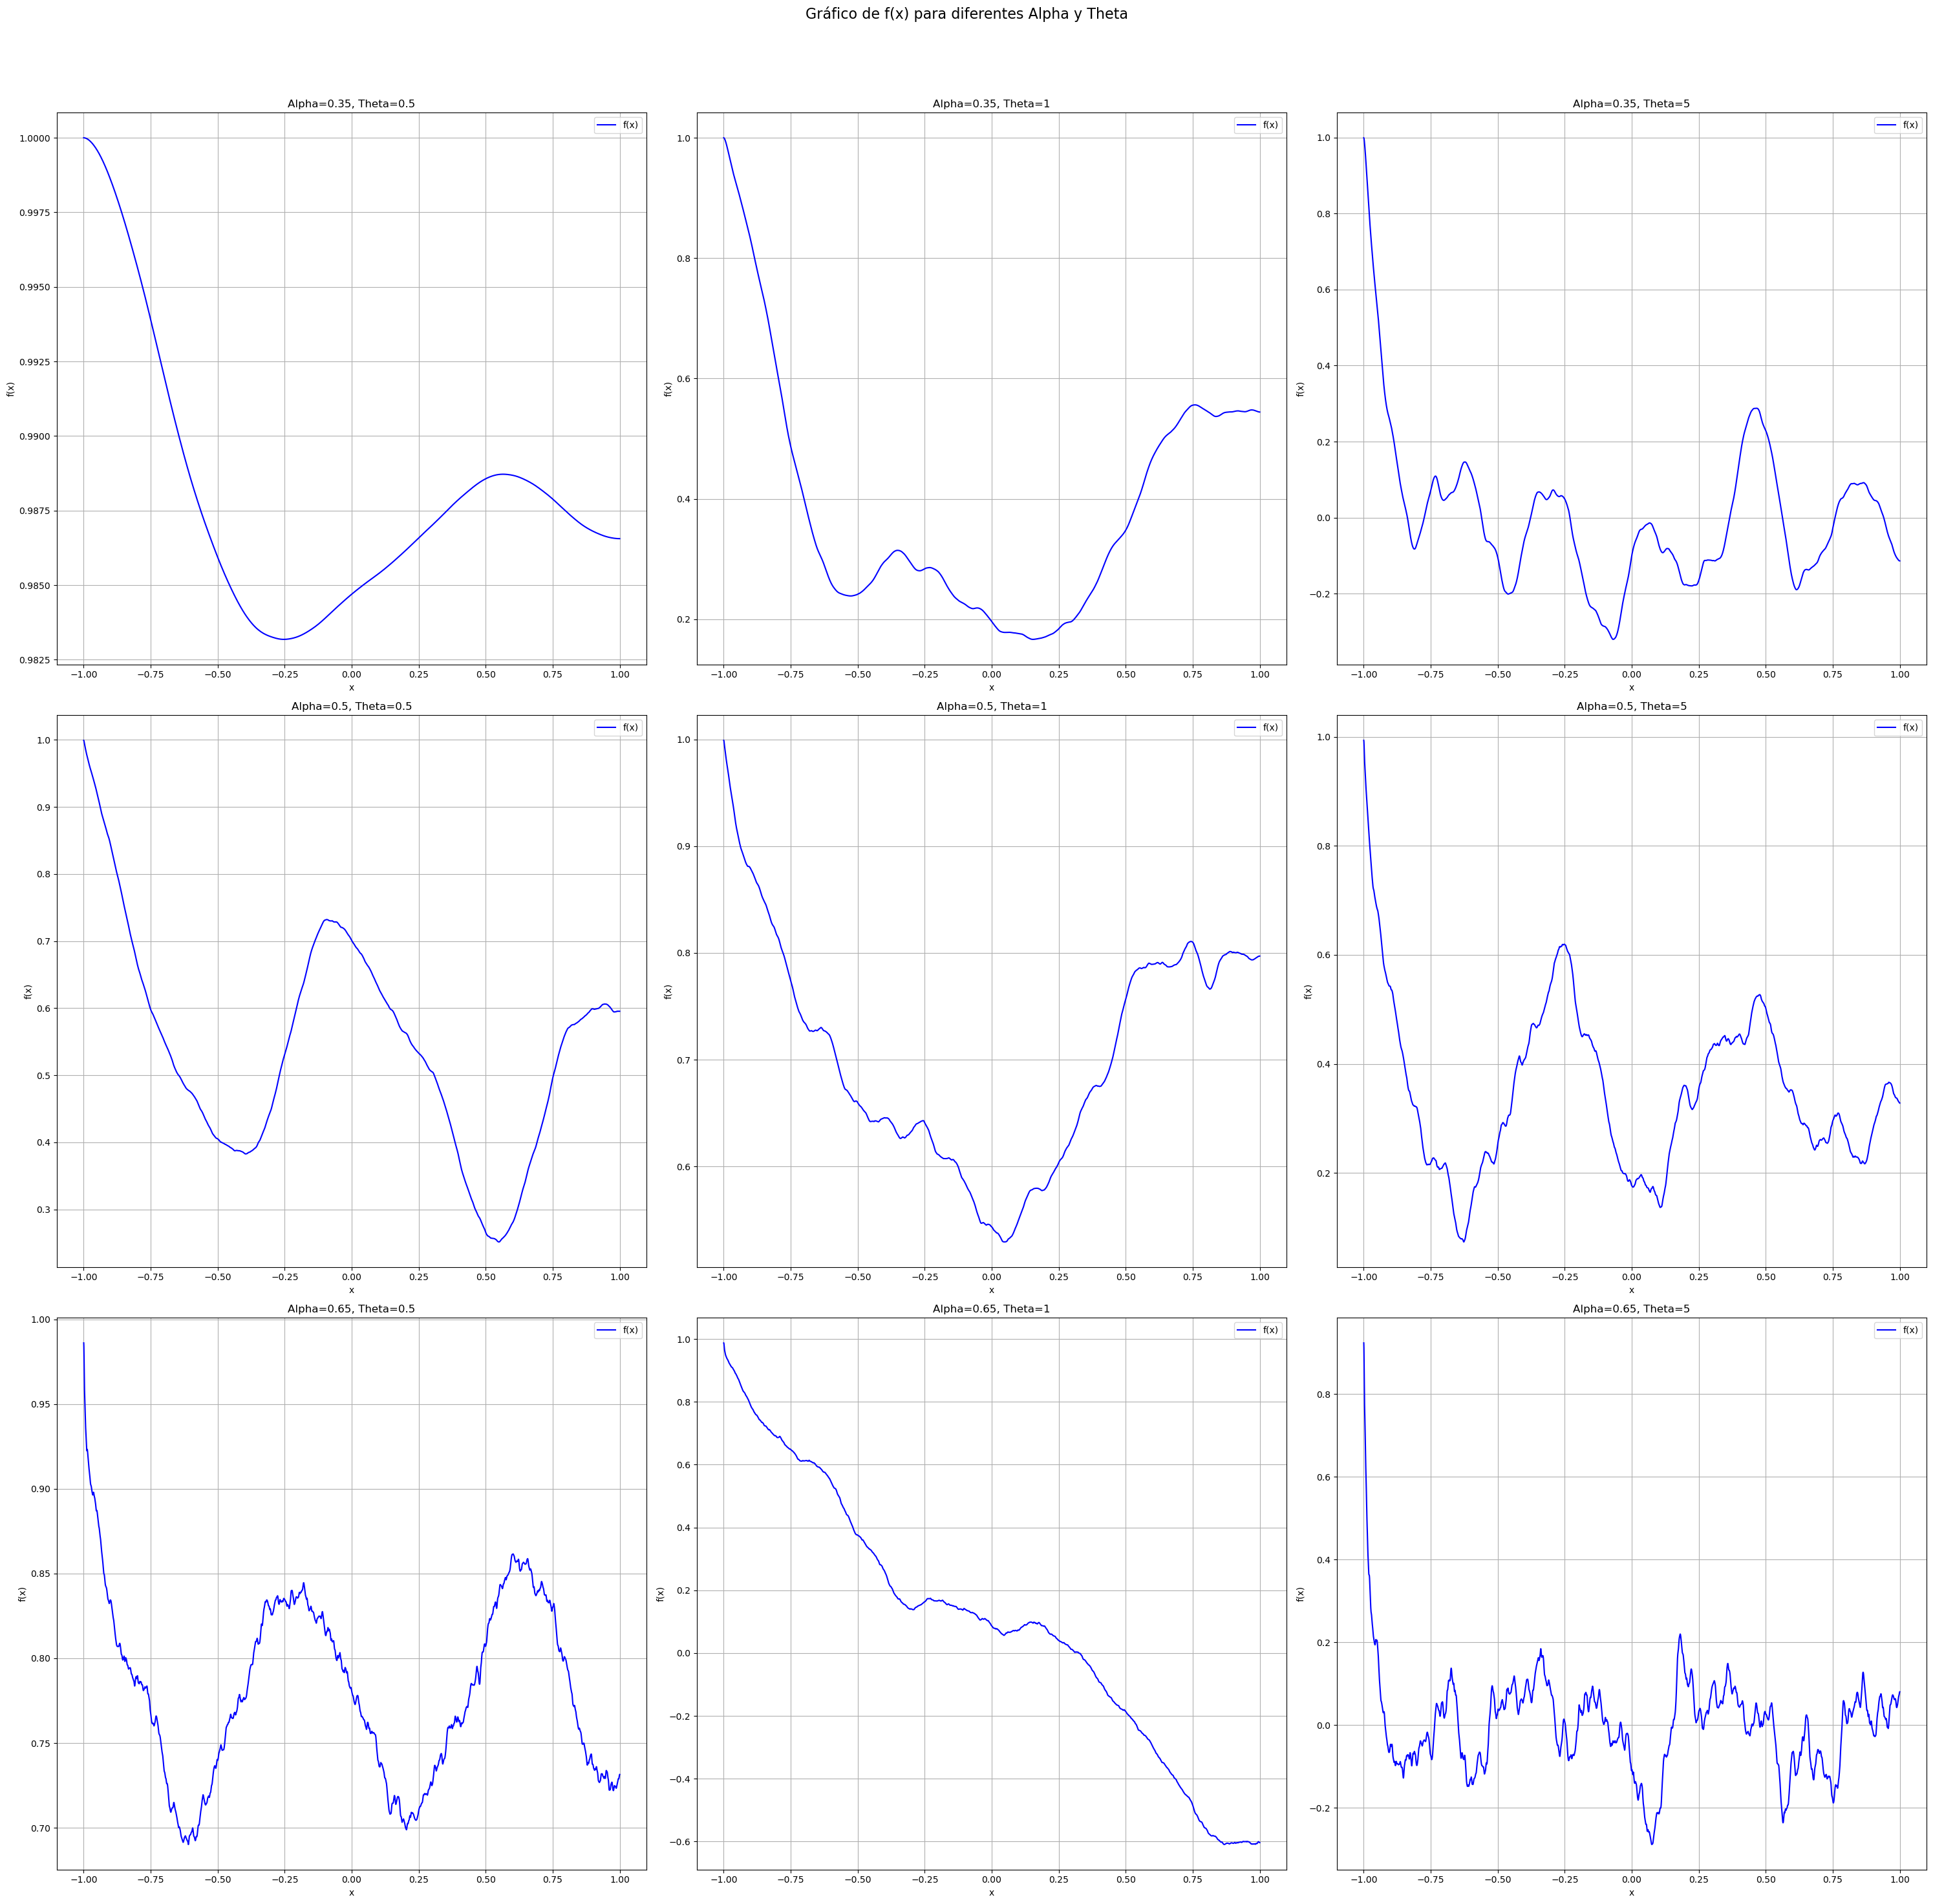

In [133]:
# Define the range for x values
x_min = -1
x_max = 1

# Define the maximum value for k and the size of the array
n_max = 1_000
N_max = 10_000

tol=0.1

# Define alpha and theta parameters
alpha_values = [0.35, 0.5, 0.65]
theta_values = [0.5, 1, 5]

# Create an array of x values
x = np.linspace(x_min, x_max, N_max)

# Create a 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
fig.suptitle('Gráfico de f(x) para diferentes Alpha y Theta', fontsize=16)

# Iterate through alpha and theta values
for i, alpha in enumerate(alpha_values):
    for j, theta in enumerate(theta_values):
        ax = axes[i, j]
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        
        # Simulate Wk values
        Wk = simulate_Wk(n_max, alpha, theta)

        if np.abs(np.sum(Wk)-1) > tol: print(f'Warning: For {alpha=} y {theta=} the diff is {np.abs(1-np.sum(Wk))}')
        
        # Generate periodic base functions for different values of k
        f = generate_f_periodic(Wk, x)
        
        # Plot the function with the corresponding label
        ax.plot(x, f, label='f(x)', color='blue')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True)
        ax.legend()

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

Comparemos con los comportamientos de los $W_k$ respectivos.

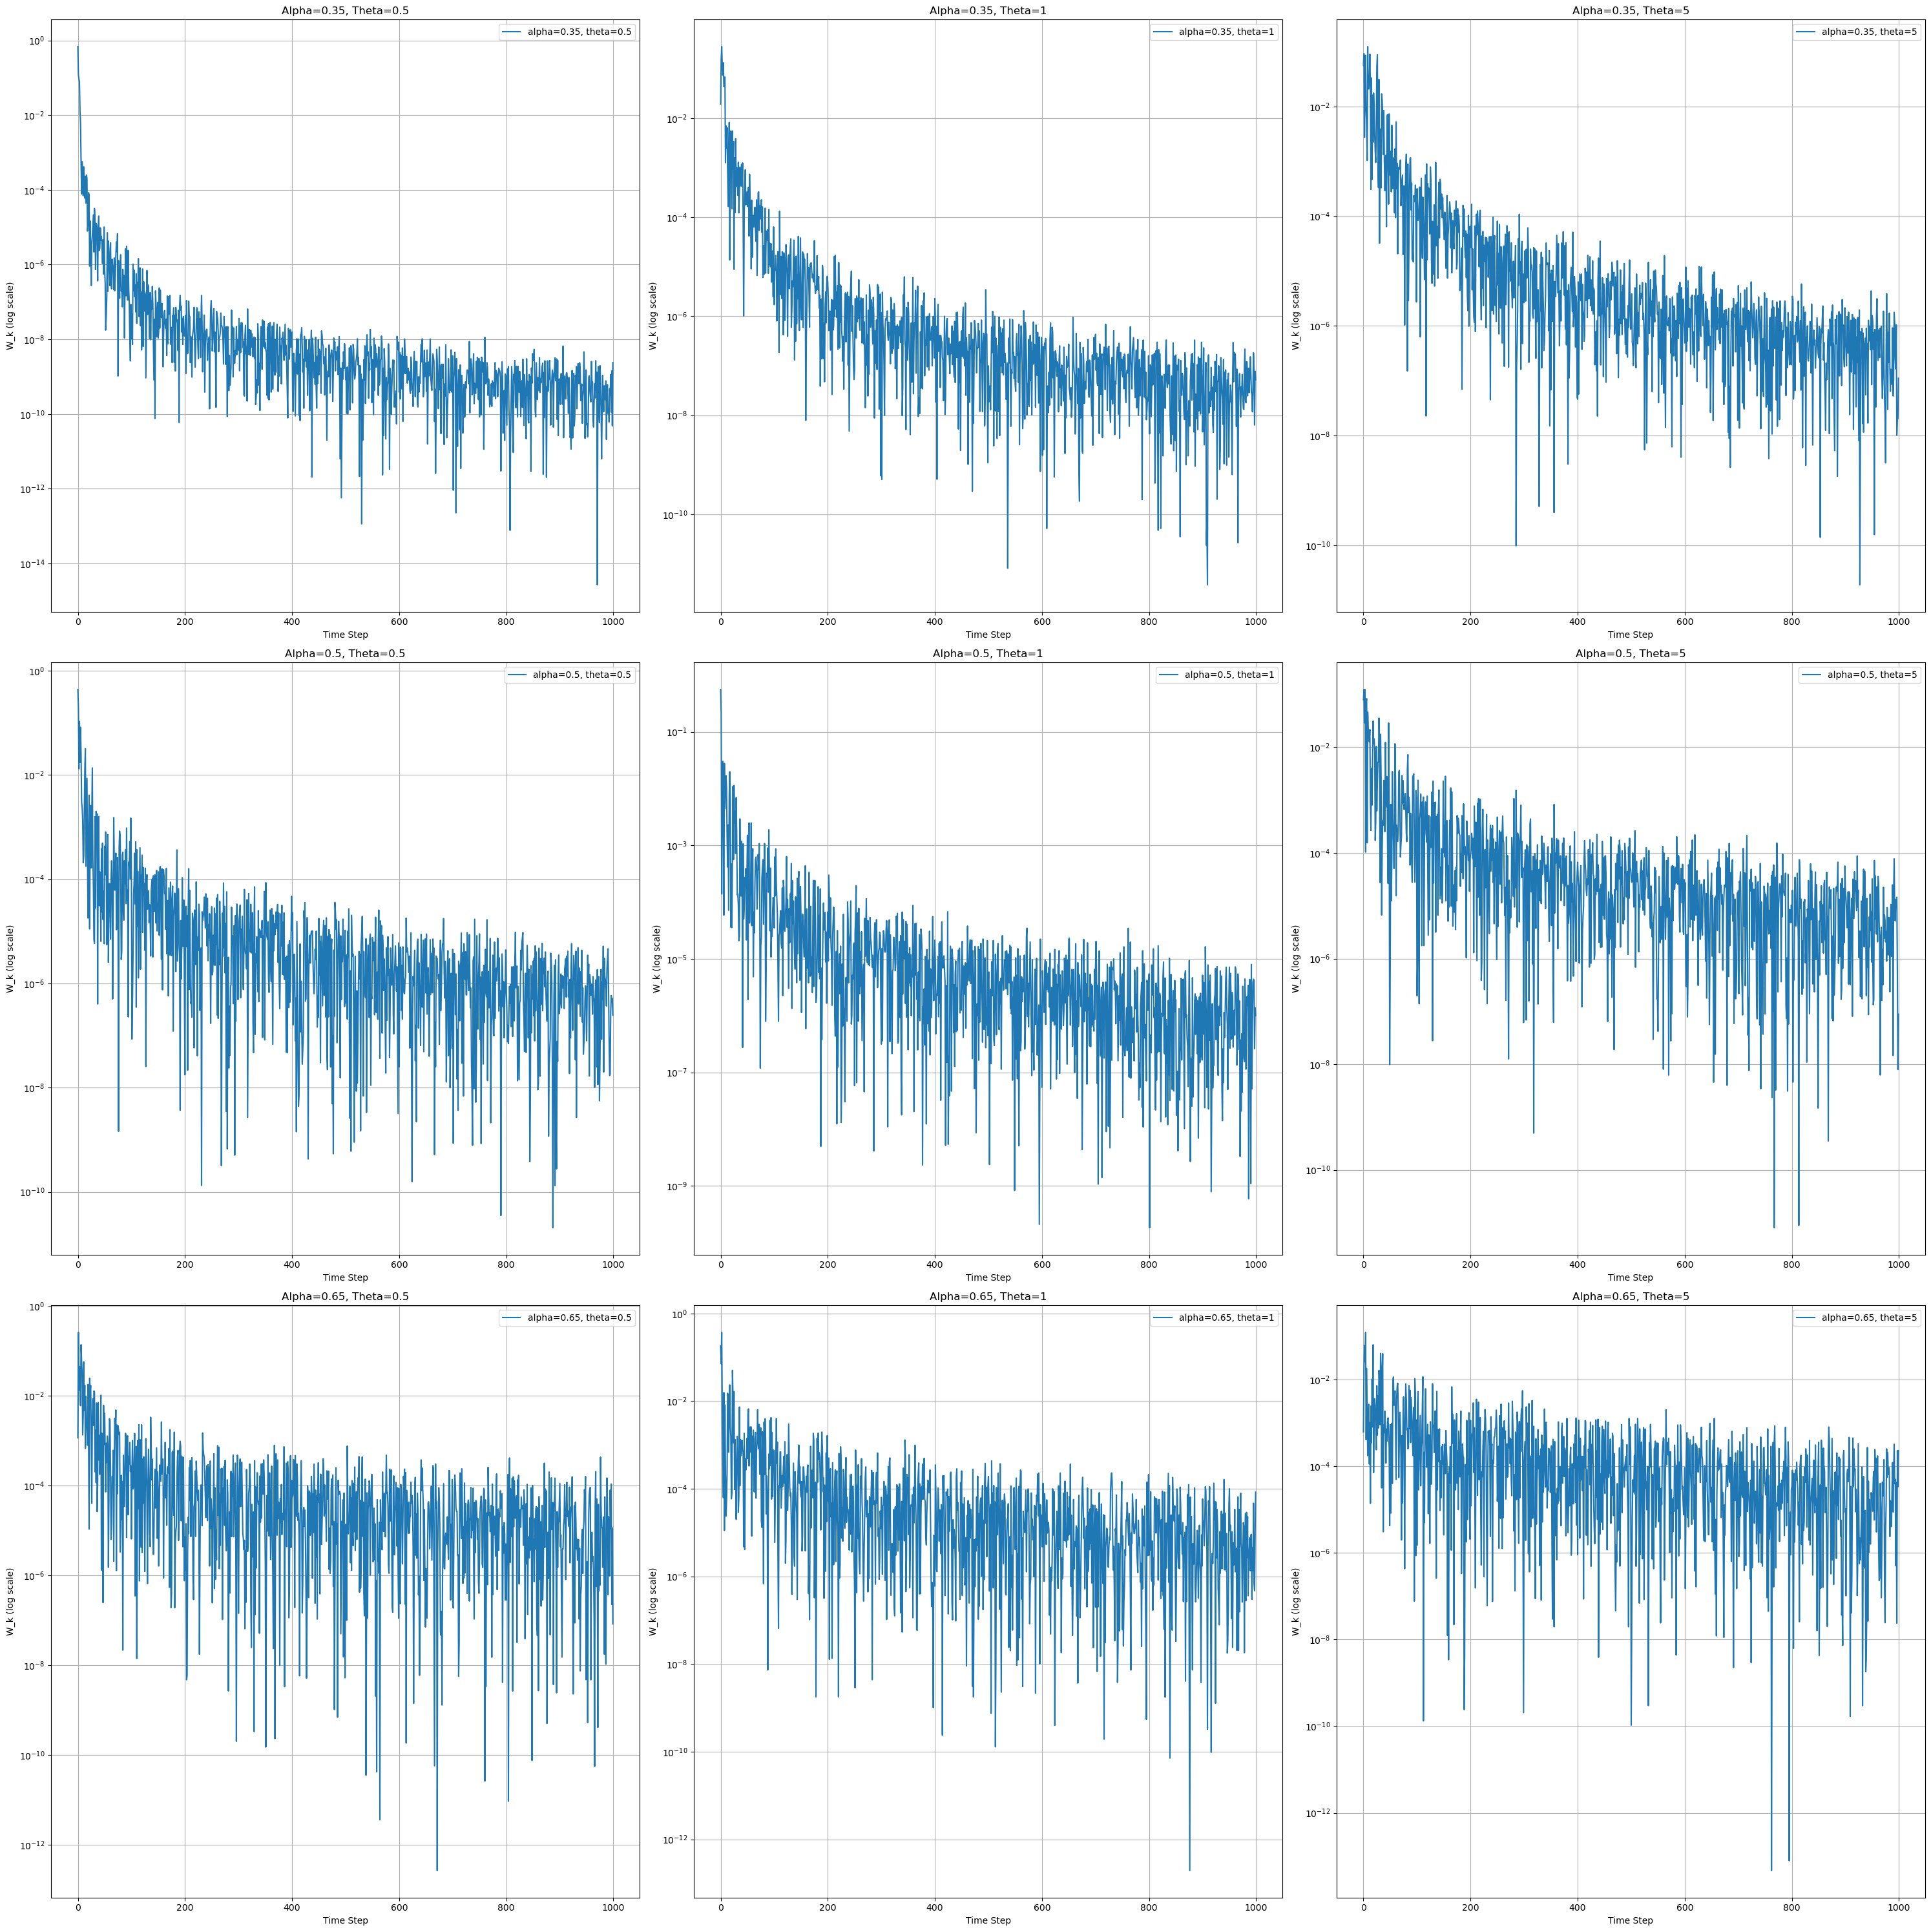

In [135]:
# Definir parámetros y configuración
n_max = 1_000  # Tamaño maximo de la serie de tiempo
alpha_grid = [0.35, 0.5, 0.65]  # Valores de alpha
theta_grid = [0.5, 1, 5]  # Valores de theta

num_plots = len(alpha_grid) * len(theta_grid)  # Número total de gráficos

# Crear subplots para cada combinación de alpha y theta
fig, axes = plt.subplots(len(alpha_grid), len(theta_grid), figsize=(30, 30))

# Iterar a través de los valores de alpha y theta
for i, alpha in enumerate(alpha_grid):
    for j, theta in enumerate(theta_grid):
        # Simular la serie de tiempo utilizando simulate_Wk
        Wk = simulate_Wk(n_max, alpha, theta)
        
        # Graficar la serie de tiempo en el subplot correspondiente
        ax = axes[i, j]
        ax.plot(np.arange(len(Wk)), Wk, label=f'alpha={alpha}, theta={theta}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('W_k (log scale)')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje Y
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        ax.grid(True)
        ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### 2) Sean estríctamente crecientes en $L^2([0,1])$.

Ahora considere la misma base ortogonal anterior pero en el intervalo [0,1], esta es:
$$
S = \left\{cos\left(k\pi x\right)\right\}_{k=0}^\infty
$$

In [140]:
def generate_f_periodic_01(Wk: list, x: list):
    '''Simil de la matriz N x n mostrada'''
    n = np.arange(len(Wk))
    x = np.array(x)

    # Calculate the result as a matrix using the outer product
    matrix = np.cos(np.outer(n, np.pi * (x+1) / 2)).T
    
    return matrix @ Wk

Como los $w_k$ suman a lo más 1, entonces cualquier combinación lineal de los elementos de la base será una función acotada. Escriba $f$ simulada desde dicha base con los pesos $w_k$ de longitud adecuada, entonces tanto $\exp(f)$ y $f^2$ representan funciones positivas que pertenecen a $L^2([0,1])$ dado que son acotadas.

Note que $g=\exp(f)$ es una función estrictamente positiva en todo caso.

Como una función estrictamente creciente es aquella función cuya derivada es estrictamente positiva, entonces podemos ocupar la $g$ construida para obtener
$$
h(x)=\int_0^xg(t)dt
$$
que es una función estrictamente creciente.

Para realizar este cálculo, si buscamos tener
$$
h(x)\cong
\begin{pmatrix}
h(x_0)\\
\vdots\\
h(x_N)
\end{pmatrix}
$$
entonces podemos realizar un procedimiento basado en lo siguiente:
$$
h(x_{i+1})=\int_{0}^{x_{i+1}}g(x)\,dx=\int_{x_{i}}^{x_{i+1}}g(x)\,dx+\int_{0}^{x_{i}}g(x)\,dx=\int_{x_{i}}^{x_{i+1}}g(x)\,dx+h(x_i)
$$
por lo tanto de manera recursiva podemos considerar:
$$
h(x_{i})=\sum_{j=0}^i\int_{x_{j-1}}^{x_j}g(x)\,dx
$$
para $x_{-1}=0$.

Notese que debemos realizar una aproximación de cada integral en los intervalos $[0,x_0],\dots,[x_{i-1},x_{i}],\dots, [x_{N-1},x_N]$, para esto se usará la cuadratura de Gauss.

En resumen, el esquema es el siguiente:

- Sea $N$ la cantidad de puntos que se desean para la función y $p$ la cantidad de nodos a utilizar en cada intervalo.
- Denotar $x^{(i)}=[x^{(i)}_0,\dots,x^{(i)}_p,\dots,x^{(i)}_{p-1}]$ los nodos de la cuadratura para el intervalo $i$-ésimo, para $i=0,\dots,N$.
1) Escribir $x = [x^{(0)},\dots, x^{(N)}]$.
2) Simular $f$ utilizando $W_k$ con $p*(N-1)$ elementos y $x$.
3) Calcular $\exp(f)$.
4) Aproximar $h(x_0)$ mediante la cuadratura.
5) Aproximar la integral sobre $[x_i, x_{i+1}]$ utsando la cuadratura.
6) Utilizar $h(x_i)$ ya calculado para calcular $h(x_{i+1})$ mediante la formula presentada antes. 
7) Repetir 5. hasta terminar.

El esquema anterior fue optimizado en el algoritmo.

Se iteró sobre los intervalos y se hicieron los calculos in situ, actualizando los valores a conveniencia hasta generar el array que representa a $h$.

In [199]:
def generate_h(Wk: list, x: list, p: int):
    '''x debe contener al 0'''

    # Calcula las posiciones y pesos de la cuadratura de Gauss
    x_nodes, weights = np.polynomial.legendre.leggauss(p)

    h = [0] #h(0)=0 by def

    # Sobre cada intervalo
    a = 0
    for b in x[1:]:
        # Simula f en el intervalo
        f = generate_f_periodic_01(Wk, 0.5 * (x_nodes + 1) * (b - a) + a)

        # calcula exp(g)
        g = np.exp(f)

        new = (0.5 * (b - a) * weights) @ g
        
        h.append(new + h[-1])

        a = b
    return h


# Define the parameters
n_max = 1_000
alpha = 0.5
theta = 0.5

Wk = simulate_Wk(n_max, alpha, theta)
x = np.linspace(0, 1, 1_000)

h = generate_h(Wk, x, 1_000)

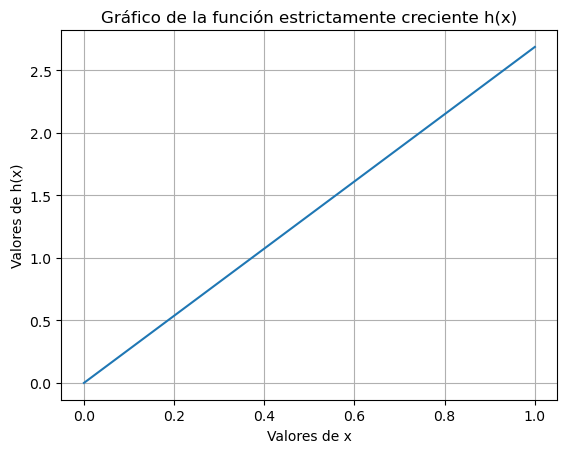

In [200]:
# Graficar la función 'h'
plt.plot(x, h, linestyle='-')

# Etiquetas y título
plt.xlabel('Valores de x')
plt.ylabel('Valores de h(x)')
plt.title('Gráfico de la función estrictamente creciente h(x)')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

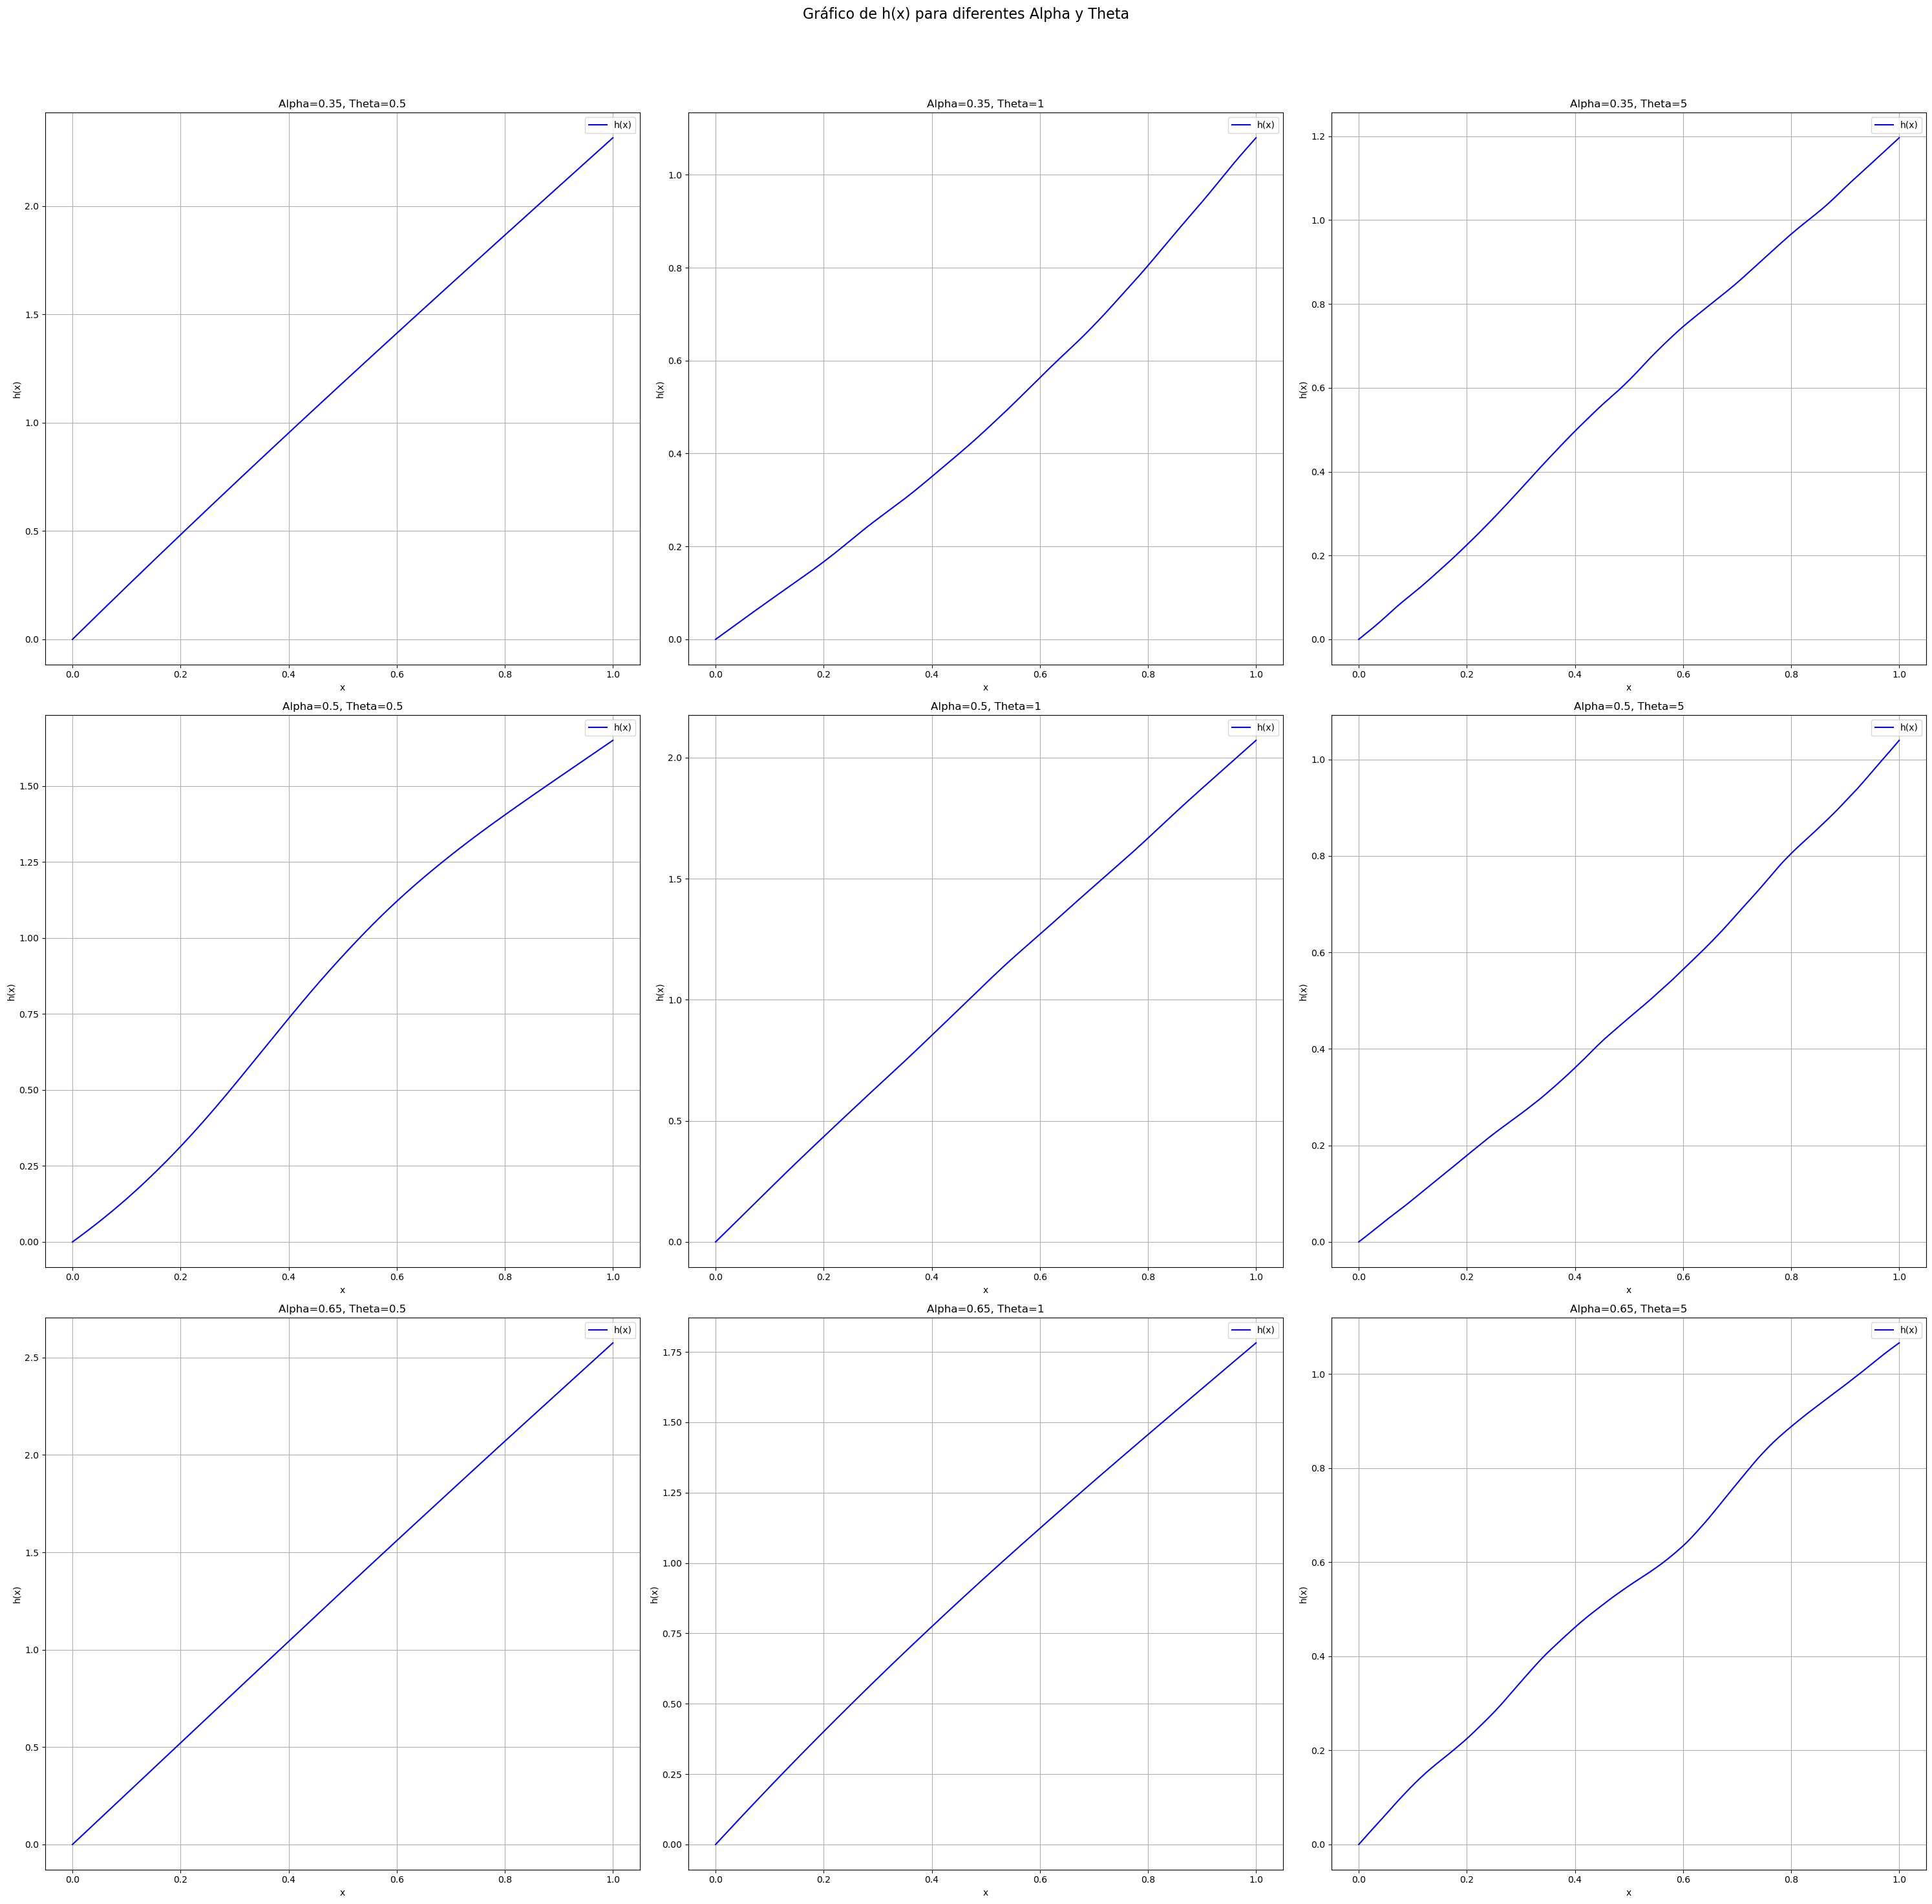

In [205]:
# Define the range for x values
x_min = 0
x_max = 1

# Define the maximum value for k and the size of the array
n_max = 1_000
N_max = 2_000

# Terminos de cuadratura
p = 50

tol=0.15

# Define alpha and theta parameters
alpha_values = [0.35, 0.5, 0.65]
theta_values = [0.5, 1, 5]

# Create an array of x values
x = np.linspace(x_min, x_max, N_max)

# Create a 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
fig.suptitle('Gráfico de h(x) para diferentes Alpha y Theta', fontsize=16)

# Iterate through alpha and theta values
for i, alpha in enumerate(alpha_values):
    for j, theta in enumerate(theta_values):
        ax = axes[i, j]
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        
        # Simulate Wk values
        Wk = simulate_Wk(n_max, alpha, theta)

        if np.abs(np.sum(Wk)-1) > tol: print(f'Warning: For {alpha=} y {theta=} the diff is {np.abs(1-np.sum(Wk))}')
        
        # Generate periodic base functions for different values of k
        h = generate_h(Wk, x, p)
        
        # Plot the function with the corresponding label
        ax.plot(x, h, label='h(x)', color='blue')
        ax.set_xlabel('x')
        ax.set_ylabel('h(x)')
        ax.grid(True)
        ax.legend()

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

Experimentalmente se vió que a mayor precisión en la integral, mejores resultados.

### 3) Sean positivas e integren 1 en $L^2([0,1])$

> No existe una base que cumpla estas carácteristicas, dado que si dos funciones de la base son positivas, entonces su producto y por ende su integral es positiva.

Dadas funciones $f(x)$, por argumentos anteriores sabemos que $\exp(f(x))$ es positiva, luego basta usar
$$
g(x)=\frac{\exp(f(x))}{\int_{0}^1\exp(f(x))dx}
$$
para que $g$ sea una función positiva que integre 1. Para generar más variedad a los experimentos, podemos utilizar la transformación $x\rightarrow x^2$ para simular, es decir:
$$
g(x)=\frac{f(x)^2}{\int_{0}^1f(x)^2dx}
$$

El esquema en este caso es mucho más sencillo:
- Simular $f$ mediante los algoritmos anteriores.
- Elevarla al cuadrado.
- Estimar su integral con cuadratura.
- Dividir por el valor aproximado.

Se deja como comentario que todas las integrales pudieron ser calculadas con otros métodos vistos en el curso en caso de estimarse necesario.

In [215]:
def generate_g(Wk: list, x: list, p=None):
    if p is None:
        p = 10*len(x)

    # Calcula las posiciones y pesos de la cuadratura de Gauss
    x_nodes, weights = np.polynomial.legendre.leggauss(p)

    # Ajusta al intervalo actual
    x_nodes = 0.5 * (x_nodes + 1)
    weights = 0.5 * weights

    # Obtain function
    f = generate_f_periodic_01(Wk, x)
    g = np.square(f)

    # Aprox integral
    integral = generate_f_periodic_01(Wk, x_nodes)
    integral = np.square(integral)

    integral = np.dot(weights, integral)

    return g/integral

# Define the parameters
n_max = 1_000
alpha = 0.5
theta = 0.5

Wk = simulate_Wk(n_max, alpha, theta)

x = np.linspace(0, 1, 1_000)

g = generate_g(Wk, x, p=10_000)

> $p$ del orden de $100\_000$ trae problemas computacionales.

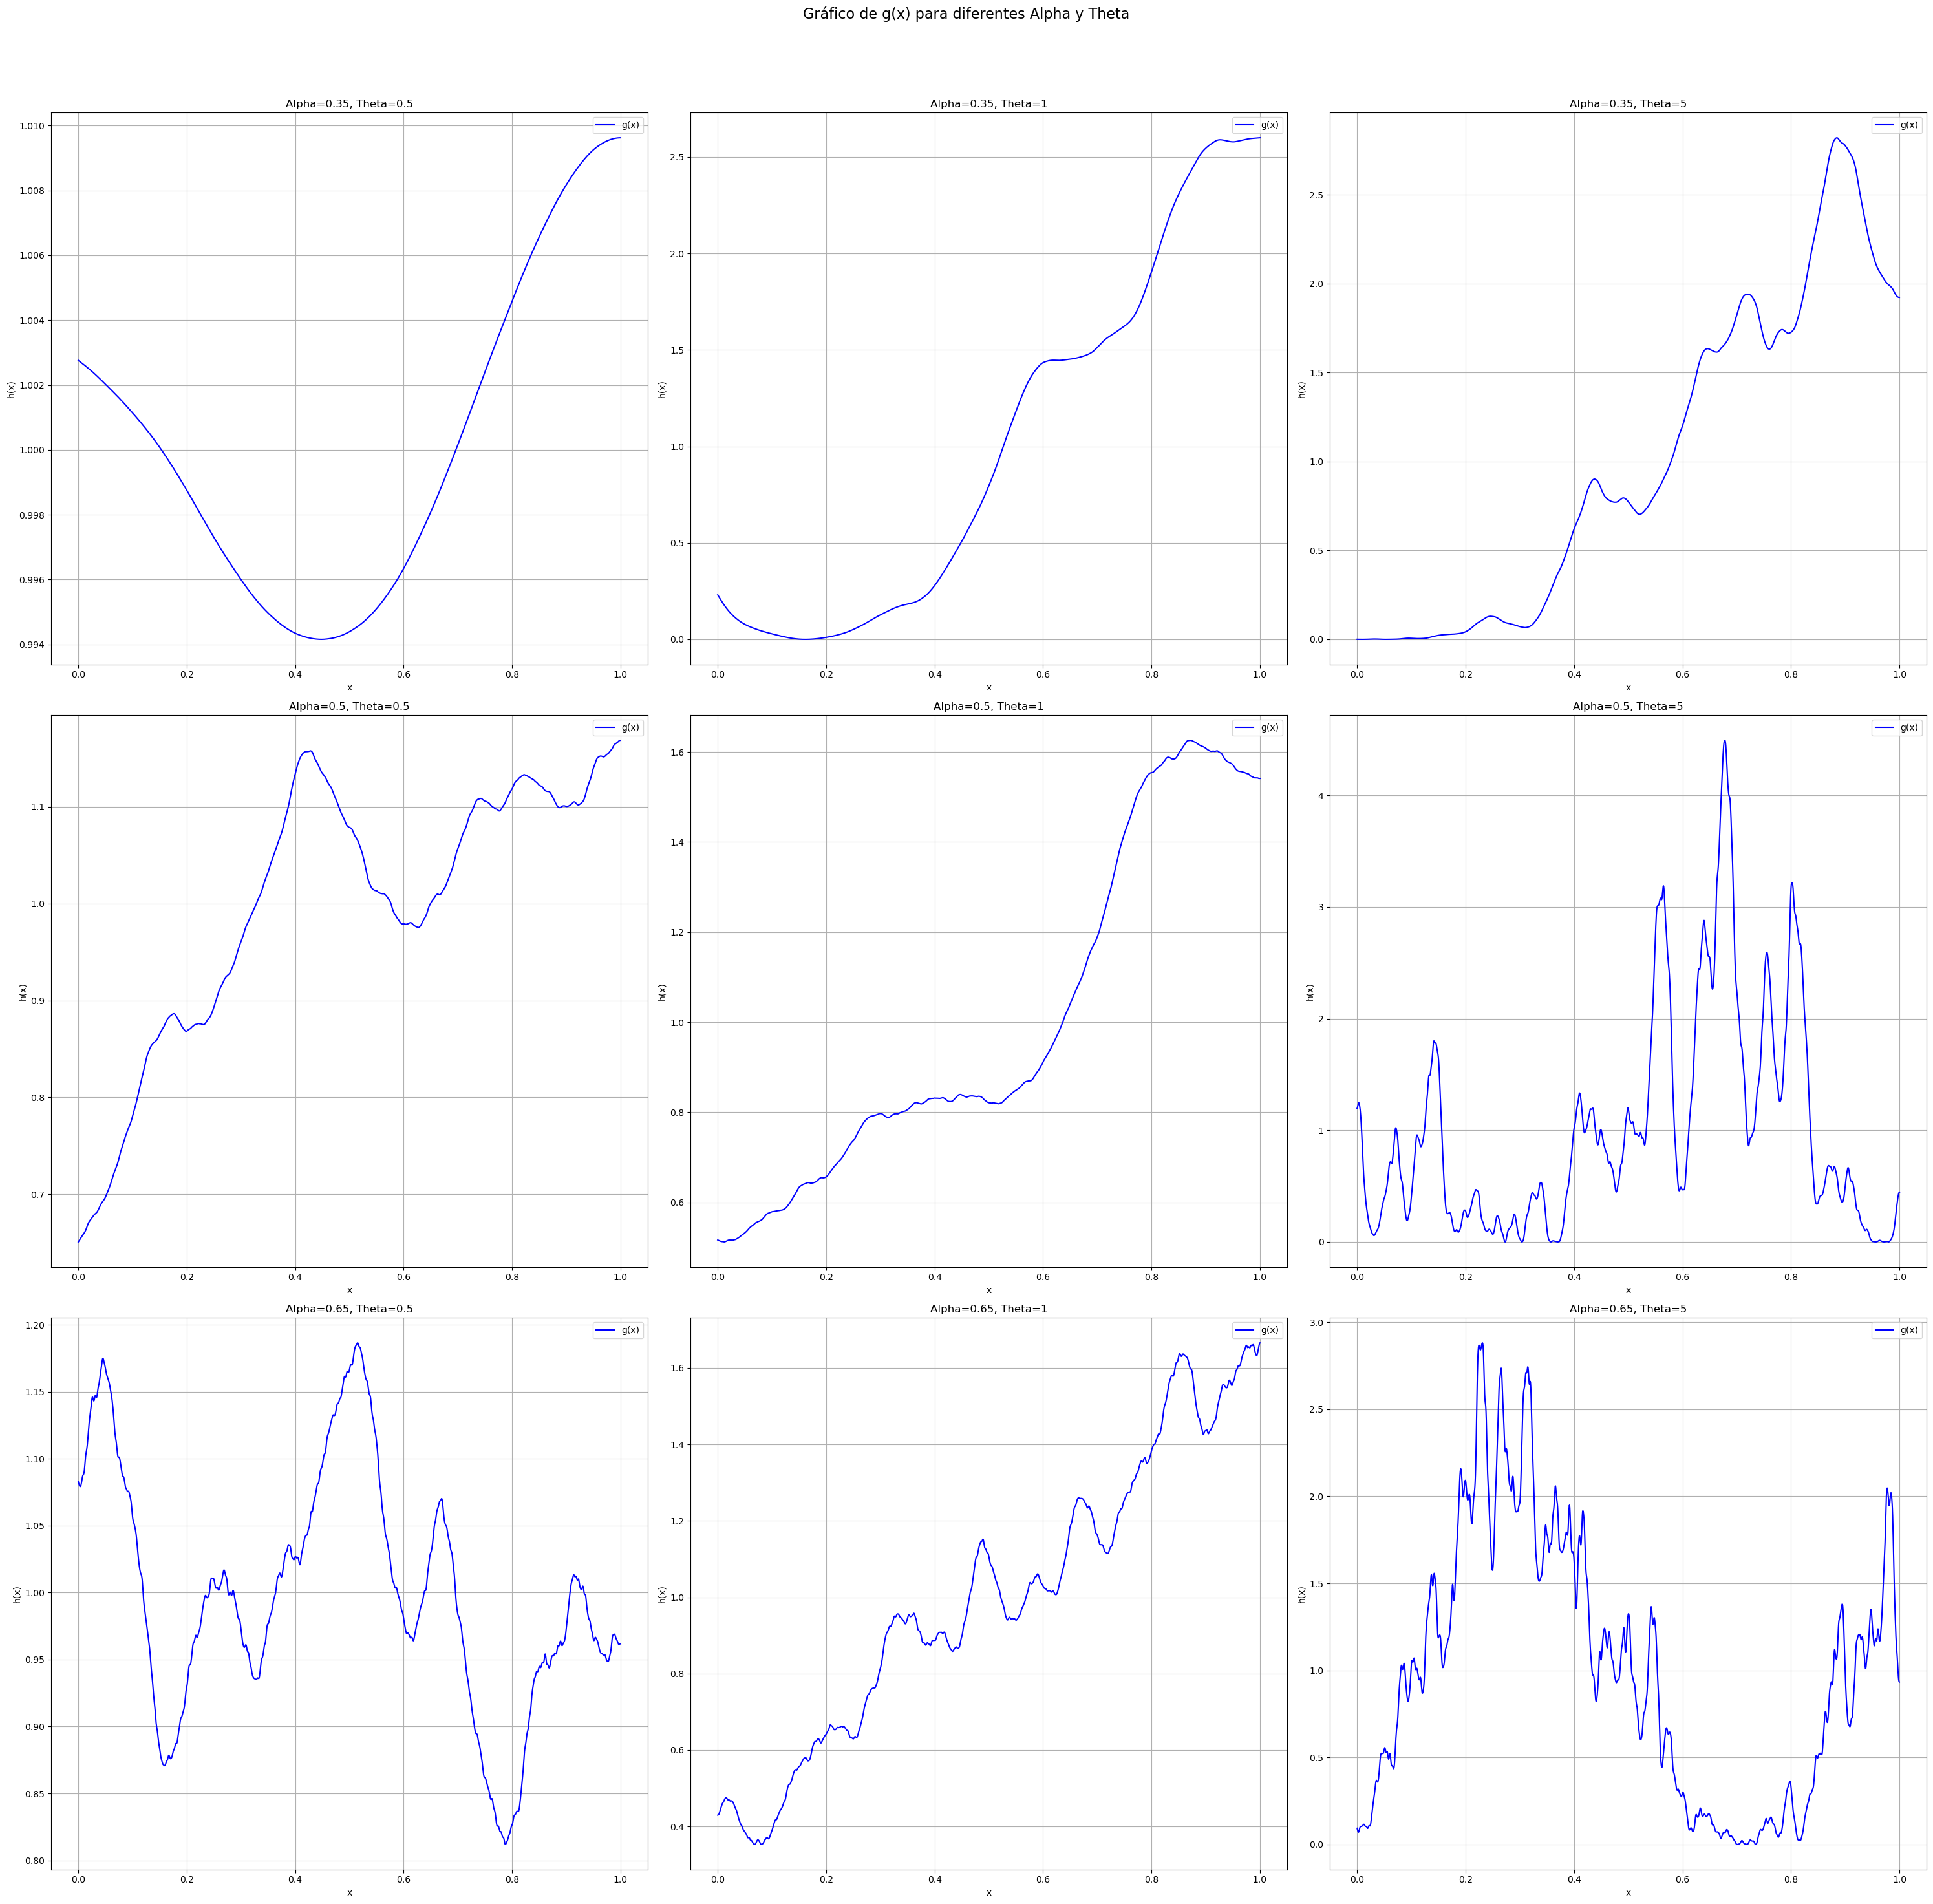

In [216]:
# Define the range for x values
x_min = 0
x_max = 1

# Define the maximum value for k and the size of the array
n_max = 1_000
N_max = 2_000

# Terminos de cuadratura
p = 10_000

tol=0.15

# Define alpha and theta parameters
alpha_values = [0.35, 0.5, 0.65]
theta_values = [0.5, 1, 5]

# Create an array of x values
x = np.linspace(x_min, x_max, N_max)

# Create a 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
fig.suptitle('Gráfico de g(x) para diferentes Alpha y Theta', fontsize=16)

# Iterate through alpha and theta values
for i, alpha in enumerate(alpha_values):
    for j, theta in enumerate(theta_values):
        ax = axes[i, j]
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        
        # Simulate Wk values
        Wk = simulate_Wk(n_max, alpha, theta)

        if np.abs(np.sum(Wk)-1) > tol: print(f'Warning: For {alpha=} y {theta=} the diff is {np.abs(1-np.sum(Wk))}')
        
        # Generate periodic base functions for different values of k
        g = generate_g(Wk, x, p)
        
        # Plot the function with the corresponding label
        ax.plot(x, g, label='g(x)', color='blue')
        ax.set_xlabel('x')
        ax.set_ylabel('h(x)')
        ax.grid(True)
        ax.legend()

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()